# Experience 1

### Importation des librairies utilisées

In [134]:
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from bokeh.transform import cumsum
from matplotlib.ticker import ScalarFormatter
import matplotlib.dates as mdates
import math as math
import pandas as pd

### Téléchargement des données

In [2]:
#Repertoire ou le fichier se trouve
path_file = 'C:/Users/useem/OneDrive - UQAM/08- Automne 2025/SCA5460 - Laboratoire 3/Experience 1/imerg_pr_201911_3h.nc4'

# Nom de la variable
var_name = 'precipitationCal'

# Pour lire le fichier
print('Reading file: ', path_file)
ds_i = xr.open_dataset(path_file)
ds_i.close()
print('Reading file: DONE')
precipitation = ds_i[var_name]
lons = ds_i['lon'].values
lats = ds_i['lat'].values

Reading file:  C:/Users/useem/OneDrive - UQAM/08- Automne 2025/SCA5460 - Laboratoire 3/Experience 1/imerg_pr_201911_3h.nc4
Reading file: DONE


## Kuala Lumpur

#### Série temporelle

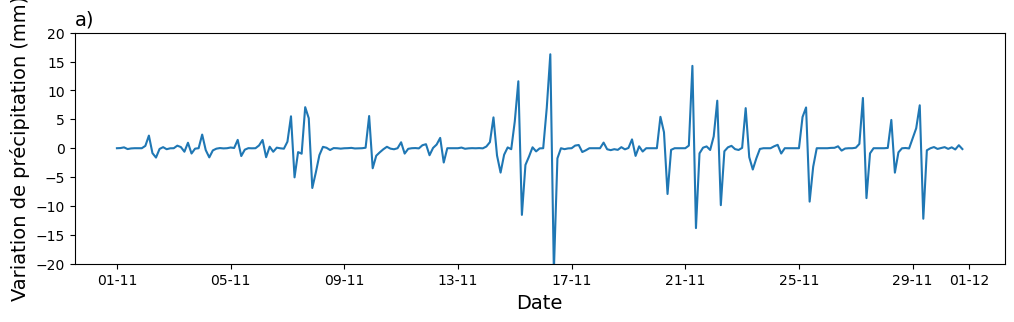

In [142]:
# Créé une liste avec les précipitations à la position selectionné au point de grille le plus proche
lat_kuala = 3.1
lon_kuala = 101.6
Serie_kuala = ds_i['precipitationCal'].sel(lat=lat_kuala, lon=lon_kuala, method='nearest').values
temps = ds_i['time']
var = np.diff(Serie_kuala)
#Création de la série temporelle
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(temps[:-1], var)
ax.set_ylabel("Variation de précipitation (mm)", size=14)
ax.set_xlabel("Date", size=14)
ax.set_ylim(-20, 20)
ax.set_title("a)", size=14, loc='left')  # ajout d'un titre pour identifier le graphique
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))  #pour afficher les date en mois année
fig.savefig('serie_kuala.png', bbox_inches='tight')

### Accumulation totale de précipitation

In [71]:
Acum_Kuala = np.sum(Serie_kuala)

print("La quantité de précipitation:", Acum_Kuala)

0.0
La quantité de précipitation: 277.08072


### Fréquence de précipitation

In [85]:
f_k = 0
l = 0
for i in Serie_kuala:
    l = l + 1
    if i > 0:
        f_k = f_k + 1

print("Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de", f_k)
Frequence_Kuala = f_k / l
print("La fréquence de précipitation:", Frequence_Kuala)

Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de 167
La fréquence de précipitation: 0.6958333333333333


### Précipitation moyenne

In [90]:
moyenne_k = Serie_kuala.mean()
print("La moyenne des precipitation est de", moyenne_k)
Serie_Sans_Zero = np.where(Serie_kuala == 0, np.nan, Serie_kuala)
int_moyenne_K = np.nanmean(Serie_Sans_Zero)
print("L'intensité de précipitation moyenne est de", int_moyenne_K)

La moyenne des precipitation est de 1.154503
L'intensité de précipitation moyenne est de 1.659166


### Durée maximale des événements de précipitation

In [110]:
Max = 0
N = 0
for i in range(0, len(Serie_kuala)):
    if Serie_kuala[i] > 0:
        N = N + 1
    else:
        N = 0

    if Max < N:
        Max = N
NbrHeure = Max * 3
print("La durée maximal d'un evenement est de", NbrHeure, "heures")

La durée maximal d'un evenement est de 45 heures


### Valeur maximale du taux de précipitation

In [96]:
val_max_K = np.max(Serie_kuala)
print("La valeur maximale du taux de précipitation est de", val_max_K)

La valeur maximale du taux de précipitation est de 23.248617


### Calcul de la corrélation temporelle

Les corrélation temporelle sont: 0.5424545567280731 , 0.5044237553220124 , 0.24594539685209263 et 0.2344870650315709


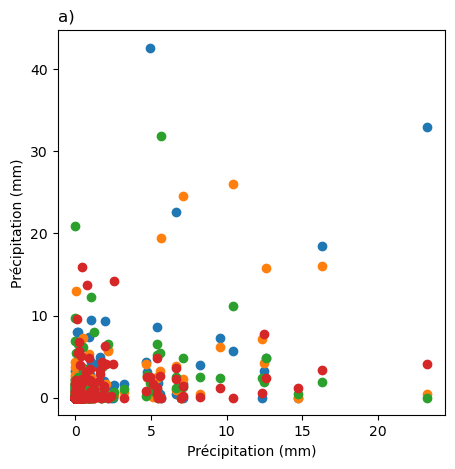

In [193]:
grille = 50
# Calcul de 50 km en degrés
degres = 111 * math.cos(math.radians(lat_kuala))
degres_50km = grille / degres

pos_lat_1 = lat_kuala + degres_50km
pos_lat_2 = lat_kuala - degres_50km
pos_lon_1 = lon_kuala + degres_50km
pos_lon_2 = lon_kuala - degres_50km

#quatre différentes positions
nord = ds_i['precipitationCal'].sel(lat=pos_lat_1, lon=lon_kuala, method='nearest')
sud = ds_i['precipitationCal'].sel(lat=pos_lat_2, lon=lon_kuala, method='nearest')
est = ds_i['precipitationCal'].sel(lat=lat_kuala, lon=pos_lon_1, method='nearest')
ouest = ds_i['precipitationCal'].sel(lat=lat_kuala, lon=pos_lon_2, method='nearest')

# calcul du coeff de corrélation
coef_kuala_1 = np.corrcoef(nord, Serie_kuala)[0, 1]
coef_kuala_2 = np.corrcoef(sud, Serie_kuala)[0, 1]
coef_kuala_3 = np.corrcoef(est, Serie_kuala)[0, 1]
coef_kuala_4 = np.corrcoef(ouest, Serie_kuala)[0, 1]
print("Les corrélation temporelle sont:", coef_kuala_1, ",", coef_kuala_2, ",", coef_kuala_3, "et", coef_kuala_4)

# Création des scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(Serie_kuala, nord, label='nord')
ax.scatter(Serie_kuala, sud, label='sud')
ax.scatter(Serie_kuala, ouest, label='ouest')
ax.scatter(Serie_kuala, est, label='est')
ax.set_xlabel('Précipitation (mm)')
ax.set_ylabel('Précipitation (mm)')
ax.set_title('a)', loc='left')
fig.savefig('scatter_kuala.png', bbox_inches='tight')

### Graphique des valeurs moyennée en fonction de l'heure

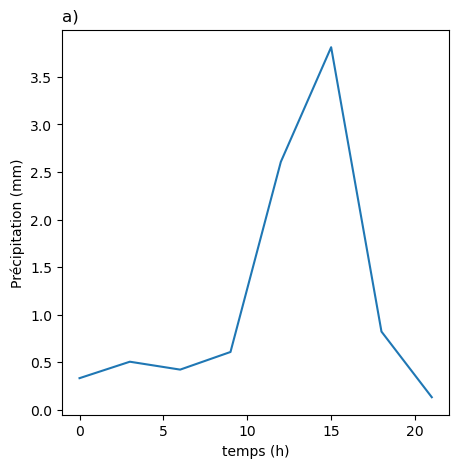

In [109]:
# Heure local
decalage_loc = (lon_kuala / 180) * 12
temp = pd.to_datetime(temps)
temps_kuala = temp + pd.to_timedelta(decalage_loc, unit='h')  # met le décalage en heure pour qu'il soit décaler
s = ds_i.sel(lat=lat_kuala, lon=lon_kuala, method='nearest')
s = s.assign_coords(time=('time', temps_kuala))
#calcul des moyennes
serie_kuala_moy = s.groupby("time.hour").mean("time")
#Création de la figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(serie_kuala_moy['hour'], serie_kuala_moy['precipitationCal'])
ax.set_title('a)', loc='left')
ax.set_xlabel('temps (h)')
ax.set_ylabel('Précipitation (mm)')
fig.savefig('heure_loc_kuala.png', bbox_inches='tight')

## Montréal

### Série temporelle

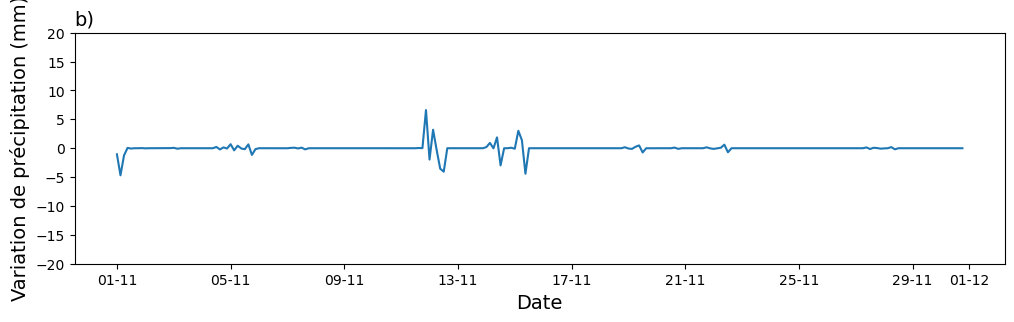

In [141]:
# Créé une liste avec les précipitations à la position selectionné au point de grille le plus proche
lat_mtl = 45.5
lon_mtl = -73.5
Serie_Montreal = ds_i['precipitationCal'].sel(lat=lat_mtl, lon=lon_mtl, method='nearest').values
var = np.diff(Serie_Montreal)
#Création de la série temporelle
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(temps[:-1], var)
ax.set_ylabel("Variation de précipitation (mm)", size=14)
ax.set_xlabel("Date", size=14)
ax.set_ylim(-20, 20)
ax.set_title("b)", size=14, loc='left')  # ajout d'un titre pour identifier le graphique
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))  #pour afficher les date en mois année
fig.savefig("Serie_Montreal.png", bbox_inches='tight')

### Acumulation totale de précipitation

In [62]:
Acum_MTL = np.sum(Serie_Montreal)
print("La quantité de précipitation:", Acum_MTL)

La quantité de précipitation: 67.31239


### Fréquence de précipitation

In [78]:
f_m = 0
l = 0
for i in Serie_Montreal:
    l = l + 1
    if i > 0:
        f_m = f_m + 1

print("Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de", f_m)
Frequence_Kuala = f_m / l
print("La fréquence de précipitation:", Frequence_Kuala)

Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de 64
La fréquence de précipitation: 0.26666666666666666


### Précipitation moyenne

In [94]:
moyenne_M = Serie_Montreal.mean()
print("La moyenne des precipitation est de", moyenne_M)
Serie_Sans_Zero_M = np.where(Serie_Montreal == 0, np.nan, Serie_Montreal)
int_moyenne_M = np.nanmean(Serie_Sans_Zero_M)
print("L'intensité de précipitation moyenne est de", int_moyenne_K)

La moyenne des precipitation est de 0.2804683
L'intensité de précipitation moyenne est de 1.659166


### Durée maximale des événements de précipitation

In [109]:
Max = 0
N = 0
for i in range(0, len(Serie_Montreal)):
    if Serie_Montreal[i] > 0:
        N = N + 1
    else:
        N = 0

    if Max < N:
        Max = N
NbrHeure = Max * 3
print("La durée maximal d'un evenement est de", NbrHeure, "heures")

La durée maximal d'un evenement est de 33 heures


### Valeur maximale du taux de précipitation

In [98]:
val_max_M = np.max(Serie_Montreal)
print("La valeur maximale du taux de précipitation est de", val_max_M)

La valeur maximale du taux de précipitation est de 7.8899417


### Calcul de la corrélation temporelle

Les corrélation temporelle sont: 0.8209959959860629 , 0.7076641651645239 , 0.8629692338774632 et 0.6631053280141929


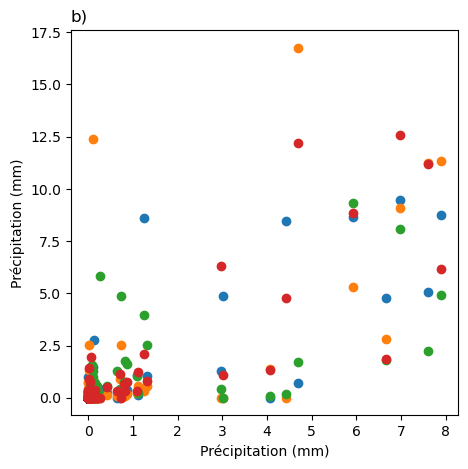

In [191]:
grille = 50
# Calcul de 50 km en degrés
degres = 111 * math.cos(math.radians(lat_mtl))
degres_50km = grille / degres

#quatre différentes positions
pos_lat_1 = lat_mtl + degres_50km
pos_lat_2 = lat_mtl - degres_50km
pos_lon_1 = lon_mtl + degres_50km
pos_lon_2 = lon_mtl - degres_50km

# calcul du coeff de corrélation
nord = ds_i['precipitationCal'].sel(lat=pos_lat_1, lon=lon_mtl, method='nearest')
sud = ds_i['precipitationCal'].sel(lat=pos_lat_2, lon=lon_mtl, method='nearest')
est = ds_i['precipitationCal'].sel(lat=lat_mtl, lon=pos_lon_1, method='nearest')
ouest = ds_i['precipitationCal'].sel(lat=lat_mtl, lon=pos_lon_2, method='nearest')
coef_mtl_1 = np.corrcoef(nord, Serie_Montreal)[0, 1]
coef_mtl_2 = np.corrcoef(sud, Serie_Montreal)[0, 1]
coef_mtl_3 = np.corrcoef(est, Serie_Montreal)[0, 1]
coef_mtl_4 = np.corrcoef(ouest, Serie_Montreal)[0, 1]
print("Les corrélation temporelle sont:", coef_mtl_1, ",", coef_mtl_2, ",", coef_mtl_3, "et", coef_mtl_4)

# Création du graphique
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(Serie_Montreal, nord, label='nord')
ax.scatter(Serie_Montreal, sud, label='sud')
ax.scatter(Serie_Montreal, ouest, label='ouest')
ax.scatter(Serie_Montreal, est, label='est')
ax.set_xlabel('Précipitation (mm)')
ax.set_ylabel('Précipitation (mm)')
ax.set_title('b)', loc='left')
fig.savefig('scatter_m.png', bbox_inches='tight')

### Graphique des valeurs moyennée en fonction de l'heure

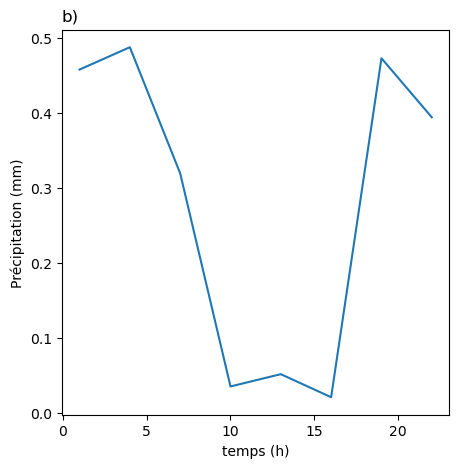

In [111]:
# Heure local
decalage_loc = (lon_mtl / 180) * 12
temp = pd.to_datetime(temps)
temps_mtl = temp + pd.to_timedelta(decalage_loc, unit='h')  # met le décalage en heure pour qu'il soit décaler
s = ds_i.sel(lat=lat_mtl, lon=lon_mtl, method='nearest')
s = s.assign_coords(time=('time', temps_mtl))
#calcul des moyennes
serie_mtl_moy = s.groupby("time.hour").mean("time")
#Création de la figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(serie_mtl_moy['hour'], serie_mtl_moy['precipitationCal'])
ax.set_title('b)', loc='left')
ax.set_xlabel('temps (h)')
ax.set_ylabel('Précipitation (mm)')
fig.savefig('heure_loc_mtl.png', bbox_inches='tight')

## Point océanique

### Série temporelle

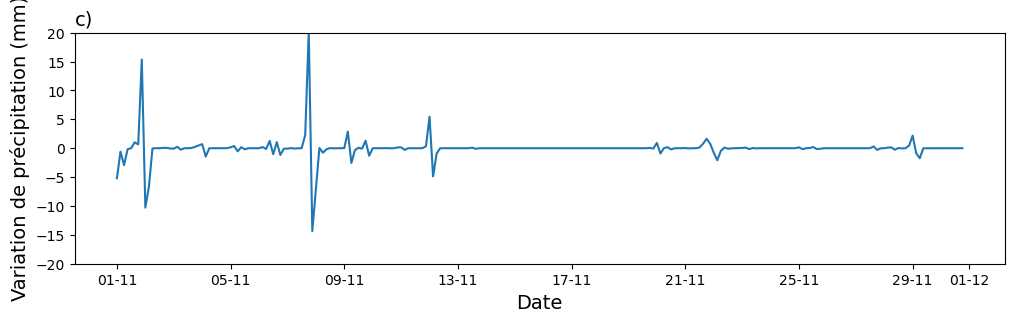

In [138]:
# Créé une liste avec les précipitations à la position selectionné au point de grille le plus proche.
lon_oceanique = 106
lat_oceanique = 5
Serie_oceanique = ds_i['precipitationCal'].sel(lat=lat_oceanique, lon=lon_oceanique, method='nearest').values
temps = ds_i['time']
var = np.diff(Serie_oceanique)
#Création de la série temporelle
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(temps[:-1], var)
ax.set_ylabel("Variation de précipitation (mm)", size=14)
ax.set_xlabel("Date", size=14)
ax.set_title("c)", size=14, loc='left')  # ajout d'un titre pour identifier le graphique
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))  #pour afficher les date en mois année
ax.set_ylim(-20, 20)
fig.savefig("Serie_oceanique.png", bbox_inches='tight')

### Acumulation totale de précipitation

In [63]:
Acum_Ocean = np.sum(Serie_oceanique)
print("La quantité de précipitation:", Acum_Ocean)

La quantité de précipitation: 114.86565


### Fréquence de précipitation

In [79]:
### Fréquence de précipitation
f_o = 0
l = 0
for i in Serie_oceanique:
    l = l + 1
    if i > 0:
        f_o = f_o + 1

print("Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de", f_o)
Frequence_Kuala = f_o / l
print("La fréquence de précipitation:", Frequence_Kuala)

Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de 97
La fréquence de précipitation: 0.4041666666666667


### Précipitation moyenne

In [93]:

moyenne_O = Serie_oceanique.mean()
print("La moyenne des precipitation est de", moyenne_O)
Serie_Sans_Zero_O = np.where(Serie_oceanique == 0, np.nan, Serie_oceanique)
int_moyenne_O = np.nanmean(Serie_Sans_Zero_O)
print("L'intensité de précipitation moyenne est de", int_moyenne_O)

La moyenne des precipitation est de 0.47860685
L'intensité de précipitation moyenne est de 1.1841819


### Durée maximale des événements de précipitation

In [108]:
Max = 0
N = 0
for i in range(0, len(Serie_oceanique)):
    if Serie_oceanique[i] > 0:
        N = N + 1
    else:
        N = 0

    if Max < N:
        Max = N
NbrHeure = Max * 3
print("La durée maximal d'un evenement est de", NbrHeure, "heures")

La durée maximal d'un evenement est de 30 heures


### Valeur maximale du taux de précipitation

In [99]:
val_max_O = np.max(Serie_oceanique)
print("La valeur maximale du taux de précipitation est de", val_max_O)

La valeur maximale du taux de précipitation est de 22.457836


### Calcul de la corrélation temporelle

Les corrélation temporelle sont: 0.4267021954914412 , 0.6753744528367833 , 0.6929806866482979 et 0.6910333602748064


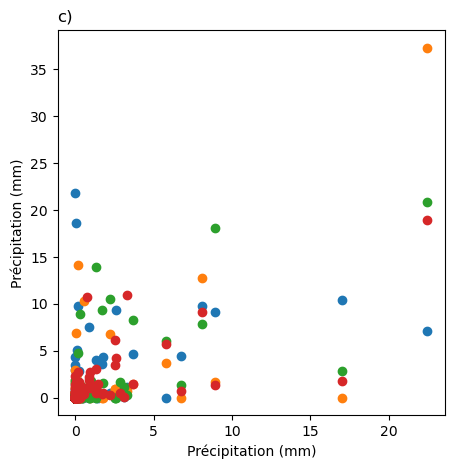

In [185]:
grille = 50
# Calcul de 50 km en degrés
degres = 111 * math.cos(math.radians(lat_oceanique))
degres_50km = grille / degres
pos_lat_1 = lat_oceanique + degres_50km
pos_lat_2 = lat_oceanique - degres_50km
pos_lon_1 = lon_oceanique + degres_50km
pos_lon_2 = lon_oceanique - degres_50km

#quatre différentes positions
nord = ds_i['precipitationCal'].sel(lat=pos_lat_1, lon=lon_oceanique, method='nearest')
sud = ds_i['precipitationCal'].sel(lat=pos_lat_2, lon=lon_oceanique, method='nearest')
est = ds_i['precipitationCal'].sel(lat=lat_oceanique, lon=pos_lon_1, method='nearest')
ouest = ds_i['precipitationCal'].sel(lat=lat_oceanique, lon=pos_lon_2, method='nearest')

# calcul du coeff de corrélation
coef_oceanique_1 = np.corrcoef(nord, Serie_oceanique)[0, 1]
coef_oceanique_2 = np.corrcoef(sud, Serie_oceanique)[0, 1]
coef_oceanique_3 = np.corrcoef(est, Serie_oceanique)[0, 1]
coef_oceanique_4 = np.corrcoef(ouest, Serie_oceanique)[0, 1]
print("Les corrélation temporelle sont:", coef_oceanique_1, ",", coef_oceanique_2, ",", coef_oceanique_3, "et",
      coef_oceanique_4)

# Création des scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(Serie_oceanique, nord, label='nord')
ax.scatter(Serie_oceanique, sud, label='sud')
ax.scatter(Serie_oceanique, ouest, label='ouest')
ax.scatter(Serie_oceanique, est, label='est')
ax.set_xlabel('Précipitation (mm)')
ax.set_ylabel('Précipitation (mm)')
ax.set_title('c)', loc='left')
fig.savefig('scatter_o.png', bbox_inches='tight')

### Graphique des valeurs moyennée en fonction de l'heure

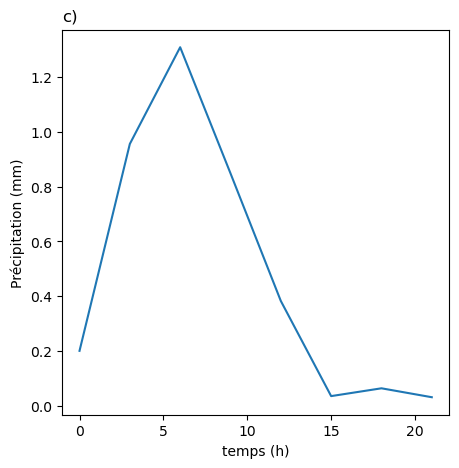

In [110]:
# Heure local
decalage_loc = (lon_oceanique / 180) * 12
temp = pd.to_datetime(temps)
temps_oceanique = temp + pd.to_timedelta(decalage_loc, unit='h')  # met le décalage en heure pour qu'il soit décaler
s = ds_i.sel(lat=lat_oceanique, lon=lon_oceanique, method='nearest')
s = s.assign_coords(time=('time', temps_kuala))
#calcul des moyennes
serie_oceanique_moy = s.groupby("time.hour").mean("time")
#Création de la figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(serie_oceanique_moy['hour'], serie_oceanique_moy['precipitationCal'])
ax.set_title('c)', loc='left')
ax.set_xlabel('temps (h)')
ax.set_ylabel('Précipitation (mm)')
fig.savefig('heure_loc_ocean.png', bbox_inches='tight')

## Série temporelle ...

### Série temporelle

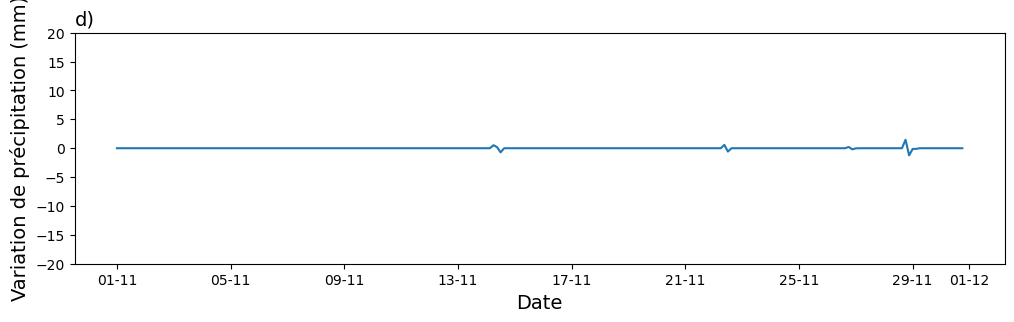

In [170]:
# Créé une liste avec les précipitations à la position selectionné au point de grille le plus proche
lat = 26.47
lon = -11.23
Serie = ds_i['precipitationCal'].sel(lat=lat, lon=lon, method='nearest').values
temps = ds_i['time']
var = np.diff(Serie)
#Création de la série temporelle
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(temps[:-1], var)
ax.set_ylabel("Variation de précipitation (mm)", size=14)
ax.set_xlabel("Date", size=14)
ax.set_title("d)", size=14, loc='left')  # ajout d'un titre pour identifier le graphique
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))  #pour afficher les date en mois année
ax.set_ylim(-20, 20)
fig.savefig('Serie_d.png', bbox_inches='tight')

### Acumulation totale de précipitation

In [181]:
Acum_1 = np.sum(Serie)
print("La quantité de précipitation:", Acum_1)

La quantité de précipitation: 3.8753872


### Fréquence de précipitation

In [52]:
### Fréquence de précipitation
f_1 = 0
l = 0
for i in Serie:
    l = l + 1
    if i > 0:
        f_1 = f_1 + 1

print("Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de", f_1)
Frequence_Kuala = f_1 / l
print("La fréquence de précipitation:", Frequence_Kuala)

Le nombre de mesures ayant un taux de précipitation supérieure a 0mm est de 13
La fréquence de précipitation: 0.05416666666666667


### Précipitation moyenne

In [180]:
moyenne_1 = Serie.mean()
print("La moyenne des precipitation est de", moyenne_1)
Serie_Sans_Zero_1 = np.where(Serie == 0, np.nan, Serie)
int_moyenne_1 = np.nanmean(Serie_Sans_Zero_1)
print("L'intensité de précipitation moyenne est de", int_moyenne_1)

La moyenne des precipitation est de 0.016147446
L'intensité de précipitation moyenne est de 0.4305986


### Durée maximale des événements de précipitation

In [179]:
Max = 0
N = 0
for i in range(0, len(Serie)):
    if Serie[i] > 0:
        N = N + 1
    else:
        N = 0

    if Max < N:
        Max = N
NbrHeure = Max * 3
print("La durée maximal d'un evenement est de", NbrHeure, "heures")

La durée maximal d'un evenement est de 9 heures


### Valeur maximale du taux de précipitation

In [178]:
val_max_1 = np.max(Serie)
print("La valeur maximale du taux de précipitation est de", val_max_1)

La valeur maximale du taux de précipitation est de 1.4740793


### Calcul de la corrélation temporelle

Les corrélation temporelle sont: 0.890285259828859 , 0.09028799982096897 , 0.6967341996841596 et 0.5627949989523822


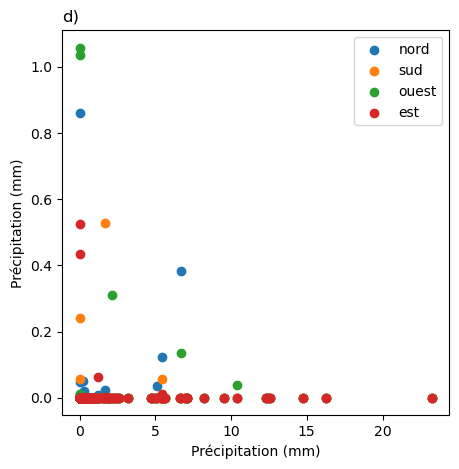

In [188]:
grille = 50
# Calcul de 50 km en degrés
degres = 111 * math.cos(math.radians(lat))
degres_50km = grille / degres

#quatre différentes positions
pos_lat_1 = lat + degres_50km
pos_lat_2 = lat - degres_50km
pos_lon_1 = lon + degres_50km
pos_lon_2 = lon - degres_50km

#Création de serie de chacun des points graphiques
nord = ds_i['precipitationCal'].sel(lat=pos_lat_1, lon=lon, method='nearest')
sud = ds_i['precipitationCal'].sel(lat=pos_lat_2, lon=lon, method='nearest')
est = ds_i['precipitationCal'].sel(lat=lat, lon=pos_lon_1, method='nearest')
ouest = ds_i['precipitationCal'].sel(lat=lat, lon=pos_lon_2, method='nearest')
# calcul du coeff de corrélation
coef_1 = np.corrcoef(nord, Serie)[0, 1]
coef_2 = np.corrcoef(sud, Serie)[0, 1]
coef_3 = np.corrcoef(est, Serie)[0, 1]
coef_4 = np.corrcoef(ouest, Serie)[0, 1]
print("Les corrélation temporelle sont:", coef_1, ",", coef_2, ",", coef_3, "et", coef_4)
# Création du scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(Serie_kuala, nord, label='nord')
ax.scatter(Serie_kuala, sud, label='sud')
ax.scatter(Serie_kuala, ouest, label='ouest')
ax.scatter(Serie_kuala, est, label='est')
ax.set_xlabel('Précipitation (mm)')
ax.set_ylabel('Précipitation (mm)')
ax.set_title('d)', loc='left')
ax.legend()
fig.savefig('Scatter_d.png', bbox_inches='tight')

### Cumulative

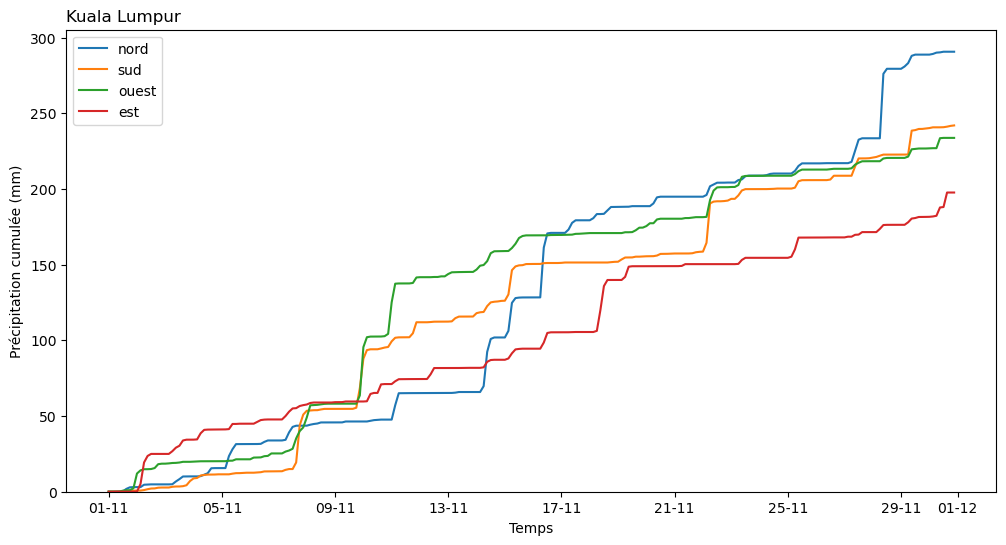

In [194]:
nord_cumul = np.cumsum(nord)
sud_cumul = np.cumsum(sud)
est_cumul = np.cumsum(est)
ouest_cumul = np.cumsum(ouest)
fig,ax = plt.subplots(figsize=(12, 6))
plt.plot(temps, nord_cumul,label='nord')
plt.plot(temps, sud_cumul,label='sud')
plt.plot(temps, ouest_cumul,label='ouest')
plt.plot(temps, est_cumul,label='est')
plt.xlabel("Temps")
ax.set_ylim(bottom=0)
ax.legend()
ax.set_title('Kuala Lumpur', loc='left')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ylabel("Précipitation cumulée (mm)")
fig.savefig('distribution_d_cumul.png', bbox_inches='tight')

### Graphique des valeurs moyennée en fonction de l'heure

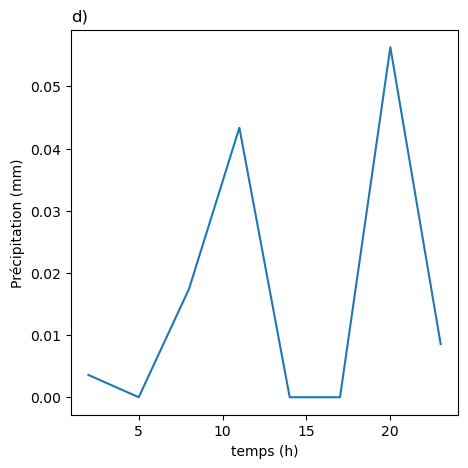

In [173]:
# Heure local
decalage_loc = (lon / 180) * 12
temp = pd.to_datetime(temps)
temps_d = temp + pd.to_timedelta(decalage_loc, unit='h')  # met le décalage en heure pour qu'il soit décaler
s = ds_i.sel(lat=lat, lon=lon, method='nearest')
s = s.assign_coords(time=('time', temps_d))
#calcul des moyennes
serie_d_moy = s.groupby("time.hour").mean("time")
#Création de la figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(serie_d_moy['hour'], serie_d_moy['precipitationCal'])
ax.set_title('d)', loc='left')
ax.set_xlabel('temps (h)')
ax.set_ylabel('Précipitation (mm)')
fig.savefig('heure_loc_d.png', bbox_inches='tight')

# Analyses spatiales

### Graphique de distribution spatiale du taux de précipitation

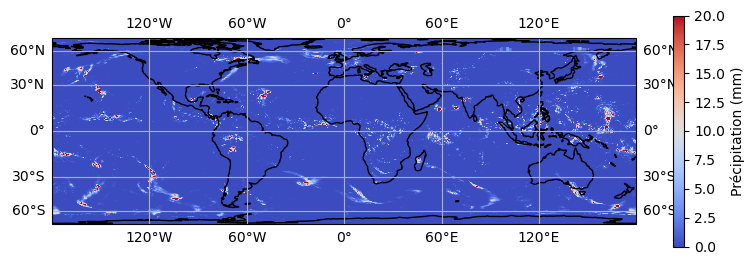

In [132]:
date = np.datetime64('2019-11-01T12:00:00.000000')
x, y = np.meshgrid(lons, lats)
#création de la série utilisé pour faire le graphique
Serie_12novembre = ds_i['precipitationCal'].sel(time=date, method='nearest').values

plt.figure(figsize=(9.42477796077, 3))
ax = plt.axes(projection=ccrs.LambertCylindrical())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)  # draw labels true pour afficher les latitudes et longitudes
m = ax.pcolormesh(x, y, Serie_12novembre, vmin=0, vmax=20, transform=ccrs.PlateCarree(), shading='nearest',
                  cmap='coolwarm')
plt.colorbar(m, ax=ax, label='Précipitation (mm)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout
plt.savefig('distrib_1nov.png', bbox_inches='tight')

### Histogramme logarithmique

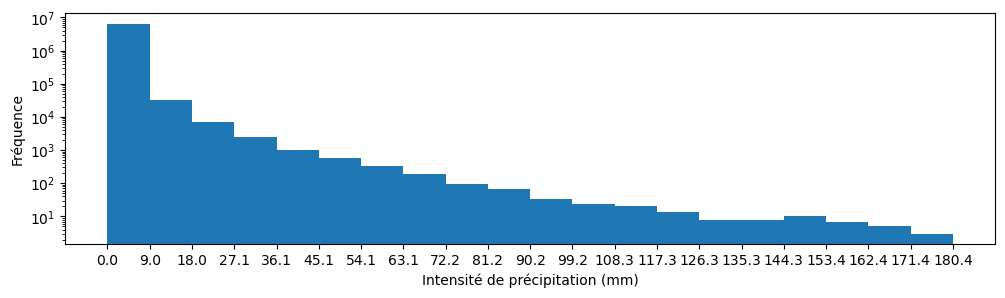

In [149]:
bin = 20
min_val = np.min(Serie_12novembre)
max_val = np.max(Serie_12novembre)
# Création des echelle logarithmique
bins = np.linspace(min_val, max_val, bin + 1)
Serie_12novembre = Serie_12novembre.ravel()
# Création de l'histogramme
fig, ax = plt.subplots(figsize=(12, 3))
ax.hist(Serie_12novembre, bins=bins)
ax.set_yscale("log")

# Permet d'avoir des axes personnasiler
ax.set_xlabel('Intensité de précipitation (mm)')
ax.set_ylabel('Fréquence')
ax.set_xticks(bins)  # ticks aux bornes des bins
plt.savefig('histopremiernov.png', bbox_inches='tight')

### graphique qui montre la distribution spatiale du taux de précipitation moyenné sur tout le mois

In [17]:
debut = np.datetime64('2019-11-01T12:00:00.000000')  # debut de la serie
fin = np.datetime64('2019-11-30T12:21:00.000000')  # fin de la serie
x, y = np.meshgrid(lons, lats)

Serie_nov = ds_i['precipitationCal'].sel(time=slice(debut, fin))
Serie_nov_moyenne = Serie_nov.mean(dim='time')


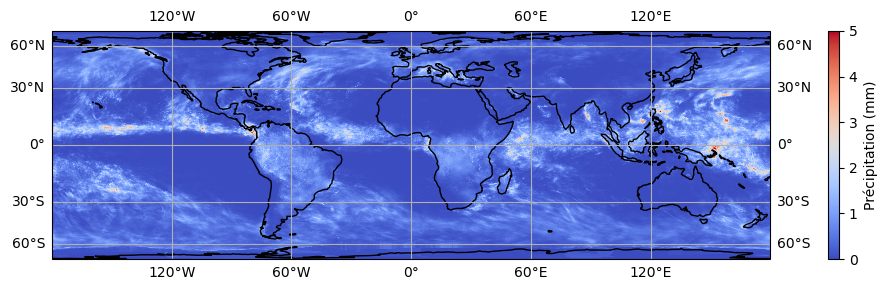

In [129]:
plt.figure(figsize=(12, 3))
ax = plt.axes(projection=ccrs.LambertCylindrical())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)  # draw labels true pour afficher les latitudes et longitudes
m = ax.pcolormesh(x, y, Serie_nov_moyenne, vmin=0, vmax=5, transform=ccrs.PlateCarree(), shading='nearest',
                  cmap='coolwarm')

plt.colorbar(m, ax=ax, label='Précipitation (mm)')
plt.tight_layout()
plt.savefig('dist_moyenne.png', bbox_inches='tight')

### Histogramme de la série moyenné

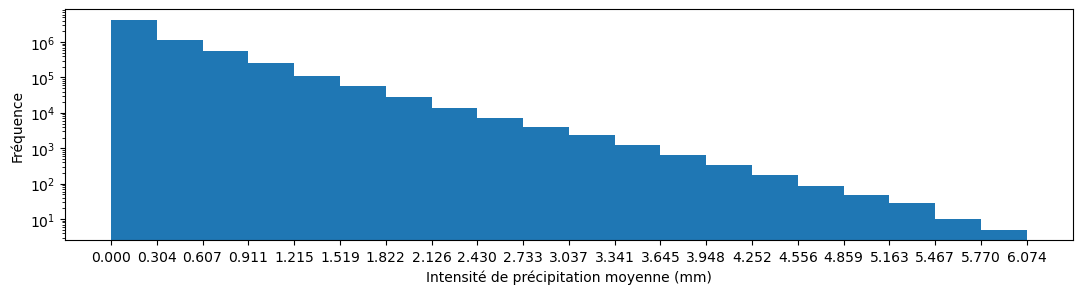

In [146]:
bin = 20
Serie_nov_moy = Serie_nov_moyenne.values
min_val = np.min(Serie_nov_moyenne)
max_val = np.max(Serie_nov_moyenne)

# Création des echelle logarithmique
bins = np.linspace(min_val, max_val, bin + 1)
Serie_nov_moy = Serie_nov_moy.ravel()

# Création de l'histogramme
fig, ax = plt.subplots(figsize=(13, 3))
ax.hist(Serie_nov_moy, bins=bins)
ax.set_yscale("log")

# Permet d'avoir des axes personnasiler
ax.set_xticks(bins)  # ticks aux bornes des bins
ax.set_xlabel('Intensité de précipitation moyenne (mm)')
ax.set_ylabel('Fréquence')
plt.savefig('histomoynov.png', bbox_inches='tight')

###  Un graphique de la distribution spatiale du taux de précipitation de Montréal (pcolormesh)

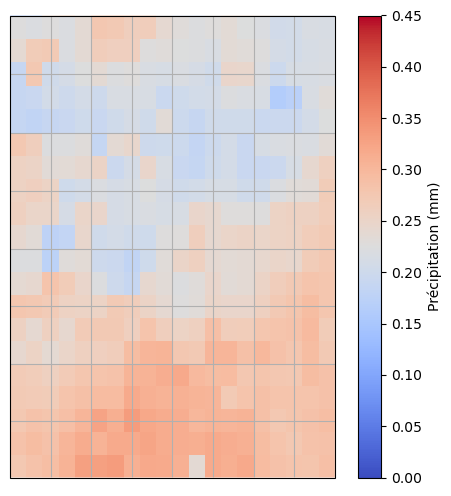

In [40]:
plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=lat_mtl))
ax.set_extent([lon_mtl - 1, lon_mtl + 1, lat_mtl - 1, lat_mtl + 1], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines()
m = ax.pcolormesh(x, y, Serie_nov_moyenne, vmin=0, vmax=0.45, transform=ccrs.PlateCarree(), shading='nearest',cmap='coolwarm')
plt.colorbar(m, ax=ax, label='Précipitation (mm)')
plt.savefig('distribution_mtl_pcolormesh.png', bbox_inches='tight')

###  Un graphique de la distribution spatiale du taux de précipitation de Montréal (contourf)

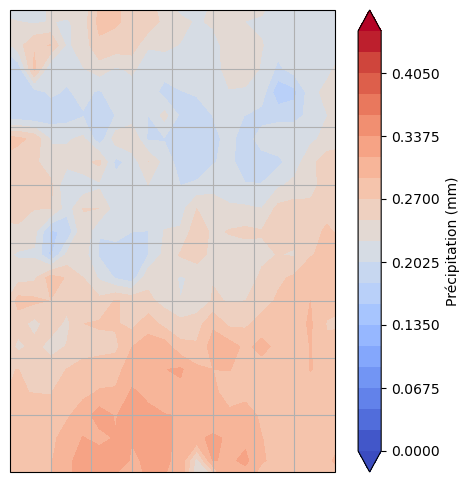

In [47]:
plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=lat_mtl))
ax.set_extent([lon_mtl - 1, lon_mtl + 1, lat_mtl - 1, lat_mtl + 1], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines()
levels = np.linspace(0, 0.45, 21)
m = ax.contourf(x, y, Serie_nov_moyenne, levels=levels, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
plt.colorbar(m, ax=ax, label='Précipitation (mm)')
plt.savefig('distribution_mtl_contour.png', bbox_inches='tight')